In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
data = pd.read_csv("insurance.csv")

In [58]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
data.shape

(1338, 7)

Text(0, 0.5, 'Count')

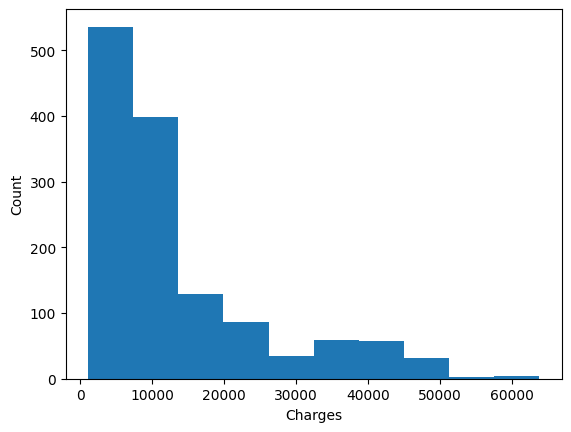

In [60]:
plt.hist(data['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')

In [61]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
mean = np.mean(data['charges'])
mean

13270.422265141257

In [63]:
std = np.std(data['charges'])
std

12105.484975561612

In [64]:
(data['charges']-mean)/std

0       0.298584
1      -0.953689
2      -0.728675
3       0.719843
4      -0.776802
          ...   
1333   -0.220551
1334   -0.914002
1335   -0.961596
1336   -0.930362
1337    1.311053
Name: charges, Length: 1338, dtype: float64

In [65]:
data['charges_z_score'] = (data['charges']-mean)/std

In [66]:
data.head()

,age,sex,bmi,children,smoker,region,charges,charges_z_score
0,19,female,27.900,0,yes,southwest,16884.92400,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.776802


In [67]:
data[data['charges_z_score']>3]

,age,sex,bmi,children,smoker,region,charges,charges_z_score
34,28,male,36.400,1,yes,southwest,51194.55914,3.132806
543,54,female,47.410,0,yes,southeast,63770.42801,4.171663
577,31,female,38.095,1,yes,northeast,58571.07448,3.742159
819,33,female,35.530,0,yes,northwest,55135.40209,3.458348
1146,60,male,32.800,0,yes,southwest,52590.82939,3.248148
1230,52,male,34.485,3,yes,northwest,60021.39897,3.861966
1300,45,male,30.360,0,yes,southeast,62592.87309,4.074389


In [68]:
data[data['charges_z_score']<-3]

,age,sex,bmi,children,smoker,region,charges,charges_z_score


In [69]:
data['charges_z_score'].min()

-1.003557345258499

In [70]:
data['charges_z_score'].max()

4.17166316317004

In [71]:
outlier_indexes = []

In [72]:
outlier_indexes.extend(data.index[data['charges_z_score']>3].tolist())

In [73]:
outlier_indexes

[34, 543, 577, 819, 1146, 1230, 1300]

In [74]:
outlier_indexes.extend(data.index[data['charges_z_score']<-3].tolist())

In [75]:
outlier_indexes

[34, 543, 577, 819, 1146, 1230, 1300]

In [76]:
new_data = data.drop(data.index[outlier_indexes])

In [77]:
new_data.head()

,age,sex,bmi,children,smoker,region,charges,charges_z_score
0,19,female,27.900,0,yes,southwest,16884.92400,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.776802


In [78]:
data.shape[0], new_data.shape[0]

(1338, 1331)

In [79]:
new_data = new_data.drop('charges_z_score', axis=1)
new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0, 0.5, 'Count')

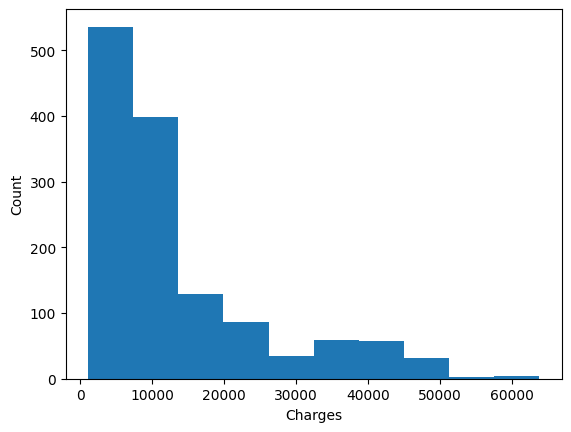

In [80]:
plt.hist(data['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

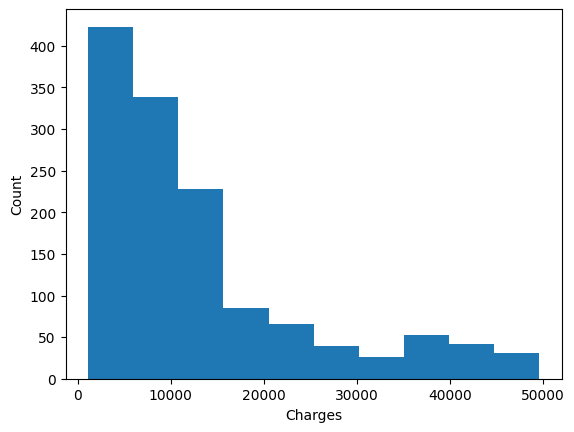

In [81]:
plt.hist(new_data['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')